In [1]:
# import required liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV , cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import xlrd
from sklearn.linear_model import LinearRegression
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('C:\\Users\\skalk\\WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<AxesSubplot:>

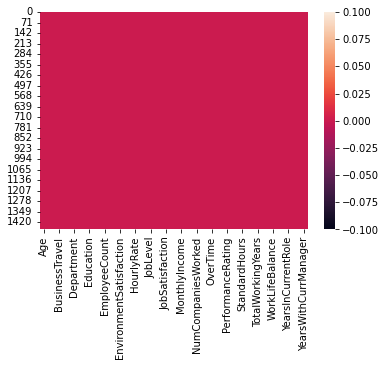

In [6]:
sns.heatmap(data.isna())

In [7]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


<AxesSubplot:>

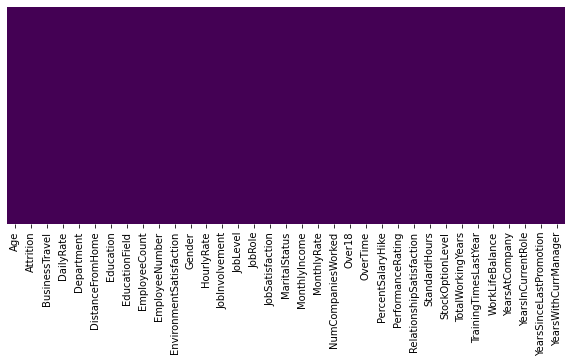

In [9]:
plt.figure(figsize =(10, 4))
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap ='viridis')

<AxesSubplot:xlabel='Attrition', ylabel='count'>

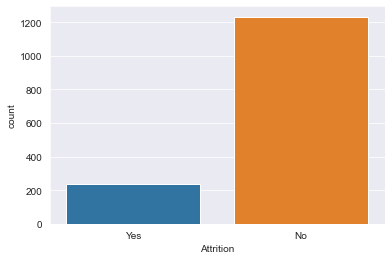

In [11]:
sns.set_style('darkgrid')
sns.countplot(x ='Attrition', data = data)

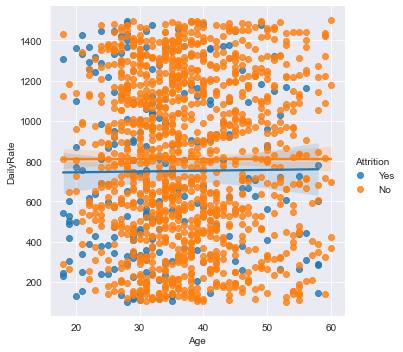

In [13]:
sns.lmplot(x = 'Age', y = 'DailyRate', hue = 'Attrition', data = data)

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

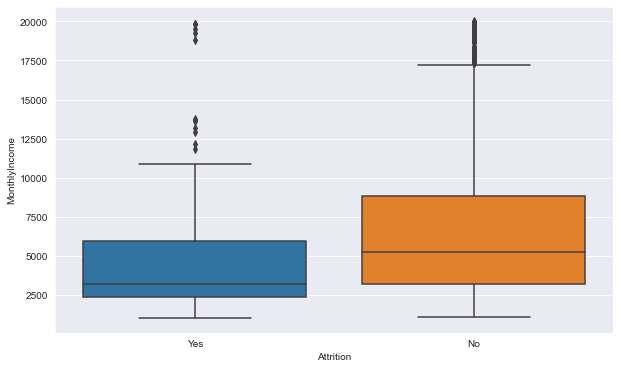

In [15]:
plt.figure(figsize =(10, 6))
sns.boxplot(y ='MonthlyIncome', x ='Attrition', data = data)

Text(0.5, 1.0, 'Number of Attritions Reported by Education Field')

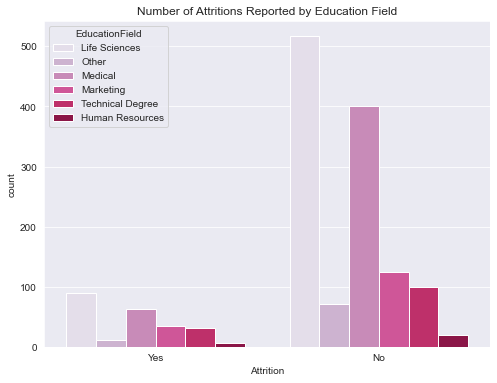

In [17]:
plt.style.use('seaborn-pastel')
plt.rcParams['figure.figsize'] = (8, 6)

sns.countplot(x=data['Attrition'],hue='EducationField',data=data, palette = 'PuRd').set_title("Number of Attritions Reported by Education Field")

In [19]:
data[(data["Attrition"] == 1)].groupby(["EducationField"]).size() / data.groupby(["EducationField"]).size()

EducationField
Human Resources    NaN
Life Sciences      NaN
Marketing          NaN
Medical            NaN
Other              NaN
Technical Degree   NaN
dtype: float64

Text(0.5, 1.0, 'Number of Attritions Reported by Job Roles')

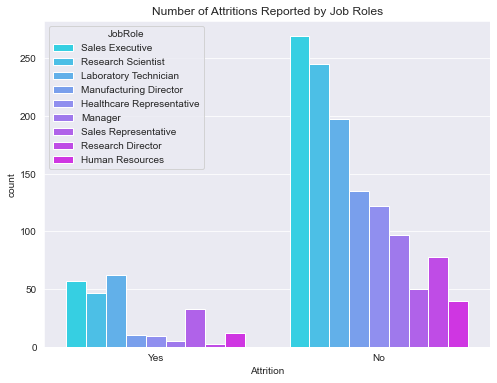

In [20]:
plt.style.use('seaborn-pastel')
plt.rcParams['figure.figsize'] = (8, 6)

sns.countplot(x=data['Attrition'],hue='JobRole',data=data, palette = 'cool').set_title("Number of Attritions Reported by Job Roles")

In [21]:
data[(data["Attrition"] == 1)].groupby(["OverTime"]).size() / data.groupby(["OverTime"]).size()

OverTime
No    NaN
Yes   NaN
dtype: float64

Text(0.5, 1.0, 'Number of Attritions Reported by Amount of Business Travel')

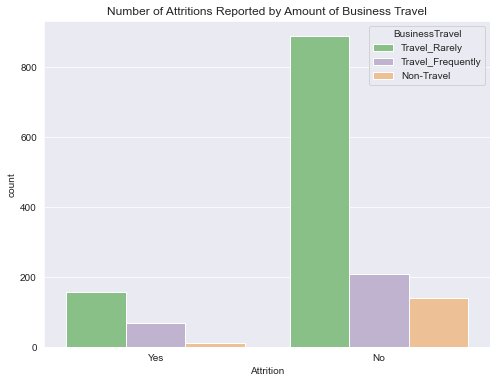

In [22]:
plt.style.use('seaborn-pastel')
plt.rcParams['figure.figsize'] = (8, 6)

sns.countplot(x=data['Attrition'],hue='BusinessTravel',data=data, palette = 'Accent').set_title("Number of Attritions Reported by Amount of Business Travel")

In [23]:
data[(data["Attrition"] == 1)].groupby(["BusinessTravel"]).size() / data.groupby(["BusinessTravel"]).size()

BusinessTravel
Non-Travel          NaN
Travel_Frequently   NaN
Travel_Rarely       NaN
dtype: float64

Text(0.5, 1.0, 'Number of Attritions Reported by Gender')

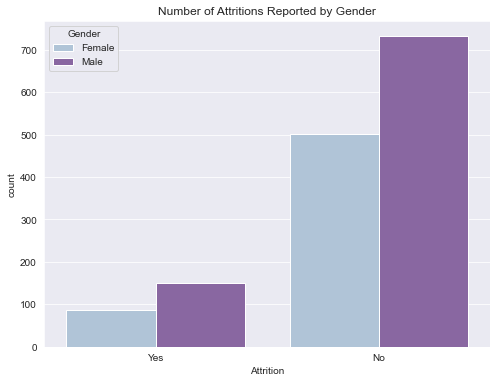

In [24]:
plt.style.use('seaborn-pastel')
plt.rcParams['figure.figsize'] = (8, 6)

sns.countplot(x=data['Attrition'],hue='Gender',data=data, palette = 'BuPu').set_title("Number of Attritions Reported by Gender")

In [25]:
data[(data["Attrition"] == 1)].groupby(["Gender"]).size() / data.groupby(["Gender"]).size()

Gender
Female   NaN
Male     NaN
dtype: float64

Text(0.5, 1.0, 'Number of Attritions Reported by Marital Status')

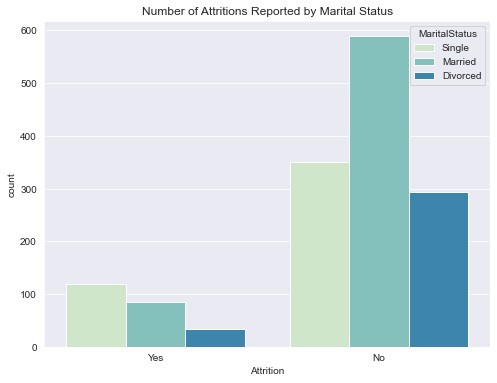

In [26]:
plt.style.use('seaborn-pastel')
plt.rcParams['figure.figsize'] = (8, 6)

sns.countplot(x=data['Attrition'],hue='MaritalStatus',data=data, palette = 'GnBu').set_title("Number of Attritions Reported by Marital Status")

In [27]:
data[(data["Attrition"] == 1)].groupby(["MaritalStatus"]).size() / data.groupby(["MaritalStatus"]).size()

MaritalStatus
Divorced   NaN
Married    NaN
Single     NaN
dtype: float64

In [28]:
data[(data["Attrition"] == 1)].groupby(["JobRole"]).size() / data.groupby(["JobRole"]).size()

JobRole
Healthcare Representative   NaN
Human Resources             NaN
Laboratory Technician       NaN
Manager                     NaN
Manufacturing Director      NaN
Research Director           NaN
Research Scientist          NaN
Sales Executive             NaN
Sales Representative        NaN
dtype: float64

In [63]:
# Separating dataset into x & y, where y is the target variable
x = data.drop('Attrition', axis = 1)
y = data['Attrition']
# Train test split using industry standard 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (1176, 34) (1176,)
Test set: (294, 34) (294,)


In [74]:
# Building logisticregression model to fit training model
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=1.0,solver='newton-cg', max_iter=100, random_state=0).fit(x_train,y_train)
LR

ValueError: could not convert string to float: 'Travel_Rarely'

In [51]:
# Using training model to predict
yhat_train = LR.predict(x_test)
yhat_test = LR.predict(x_test)

TypeError: predict() missing 1 required positional argument: 'X'

In [76]:
# Scoring the training model
from sklearn.metrics import classification_report
print (classification_report(y_test,y_train))

ValueError: Found input variables with inconsistent numbers of samples: [294, 1176]